# Unit 5 - Financial Planning

In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price
response_btc_data = requests.get(btc_url).json()


# Fetch current ETH price
response_eth_data = requests.get(eth_url).json()


# Compute current value of my crpto
current_btc_price = response_btc_data['data']['1']['quotes']['USD']['price']


current_eth_price = response_eth_data['data']['1027']['quotes']['USD']['price']

my_btc_value = current_btc_price * my_btc
my_eth_value = current_eth_price * my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $45802.80
The current value of your 5.3 ETH is $13880.59


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [11]:
# Format current date as ISO format
today = pd.Timestamp("2022-01-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
ticker_data = api.get_barset(
    tickers,
    timeframe,
    limit=1000,
    start = today,
    end = today
).df

# Preview DataFrame
ticker_data.head()

AGG                                       SPY  \
                             open     high     low   close   volume    open   
time                                                                          
2022-01-14 00:00:00-05:00  112.53  112.545  112.15  112.17  8362916  461.19   

                                                            
                             high    low   close    volume  
time                                                        
2022-01-14 00:00:00-05:00  465.09  459.9  464.68  84363989

In [12]:
# Pick AGG and SPY close prices
agg_close = float(ticker_data["AGG"]["close"])
spy_close = float(ticker_data["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $112.17
Current SPY closing price: $464.68


In [13]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close
my_agg_value = my_agg * agg_close

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23234.00
The current value of your 200 AGG shares is $22434.00


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto = my_btc_value + my_eth_value
total_stocks = my_spy_value + my_agg_value

savings = [{"crypto" : total_crypto,
            "stocks" : total_stocks }]

# Create savings DataFrame
df_savings = pd.DataFrame(savings)
df_savings = df_savings.transpose()
df_savings.rename(columns={0 : "amount"})

# Display savings DataFrame
display(df_savings)

,0
crypto,59683.394
stocks,45668.000


<AxesSubplot:ylabel='0'>

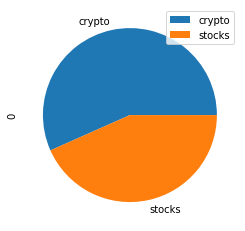

In [15]:
# Plot savings pie chart
df_savings.plot.pie(y=0)

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_stocks

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough for emergency fund!")
elif total_savings < emergency_fund:
    print(f"Your are missing ${emergency_fund - total_savings} for emergency fund")
elif total_savings == emergency_fund:
    print("Congraulations on meeting your goal for emergency fund!")

Congratulations! You have enough for emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   

                              SPY                                        
                             open      high     low     close    volume  
time                                                                     
2020-12-07 00:00:00-05:00  369.02  369.6200  367.72  369.1200  40456544  
2020-12-08 00:00:00-05:00  367.72  370.7800  367.67  370.1599  32702217  
2020-12-09 00:00:00-05:00  370.88  371.0500  365.95  366.8900  60700254  
2020-12-10 00:00:00-05:00  365.37  367.8600  364.43  366.7200  47851654  
2020-12-11 00:00:00-05:00  364.90  366.7402  363.26  366.2800  47917103

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [23]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   

                                           SPY                              \
                          daily_return    open      high     low     close   
time                                                                         
2020-12-07 00:00:00-05:00          NaN  369.02  369.6200  367.72  369.1200   
2020-12-08 00:00:00-05:00     0.000170  367.72  370.7800  367.67  370.1599   
2020-12-09 00:00:00-05:00    -0.001274  370.88  371.0500  365.95  366.8900   
2020-12-10 00:00:00-05:00     0.002211  365.37  367.8600  364.43  366.7200   
2020-12-11 00:00:00-05:00     0.001272  364.90  366.7402  363.26  366.2800   

                                                  
                             volume daily_return  
time                                              
2020-12-07 00:00:00-05:00  40456544          NaN  
2020-12-08 00:00:00-05:00  32702217     0.002817  
2020-12-09 00:00:00-05:00  60700254    -0.008834  
2020-12-10 00:00:00-05:00  47851654    -0.000463  
2020-12-11 00:00:00-05:00  47917103    -0.001200

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jdbet\Desktop\Official_Miami\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994746,0.999937,1.000022,0.998244,1.001093,0.999343,1.001415,0.996680,1.004225,1.003669,...,1.009852,1.002054,1.002794,1.004612,0.998701,0.991164,1.009325,0.999038,1.004245,1.003142
2,0.997923,0.996550,1.000741,0.996634,1.007979,1.008724,0.998312,0.999749,1.007322,1.006310,...,1.009897,1.009544,1.000638,1.009785,1.004714,0.997223,1.017269,0.994605,0.995866,0.999487
3,1.001407,0.999939,0.997229,0.998329,1.004770,0.999233,0.991437,1.005355,1.005990,1.007048,...,1.020563,1.012614,0.998380,1.007254,1.003593,0.998832,1.023268,0.995325,1.001816,0.996242
4,0.994714,1.005662,1.004088,0.997121,1.012076,0.993636,0.985942,1.000465,1.002676,1.006396,...,1.023099,1.016864,0.997427,1.009742,1.003964,1.000310,1.022269,0.999224,0.998491,0.995979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,42.845447,36.215108,55.564732,10.995781,20.178253,61.710902,27.019781,22.312461,29.365953,41.366819,...,33.629791,40.882869,25.841655,22.896298,76.090835,33.388189,48.791085,41.335444,25.635743,34.039996
7557,42.921473,36.145286,55.763167,11.040776,20.294934,61.835281,27.239581,22.546028,29.236159,41.458626,...,33.910601,41.110510,25.700869,22.901488,75.879023,33.345007,49.023451,41.463812,25.810283,34.206024
7558,42.913892,36.415506,55.704435,11.008367,20.351055,61.596260,27.230546,22.480103,29.345310,41.389139,...,34.042464,41.102612,25.905278,23.032403,75.423931,33.172902,48.842914,41.229568,25.829716,34.236705
7559,43.029416,36.746554,55.650246,11.038787,20.525392,62.105144,27.134048,22.587393,29.295503,41.269759,...,33.991838,40.943050,25.865361,23.097553,75.250458,33.213408,49.041330,41.310131,25.697181,34.275887


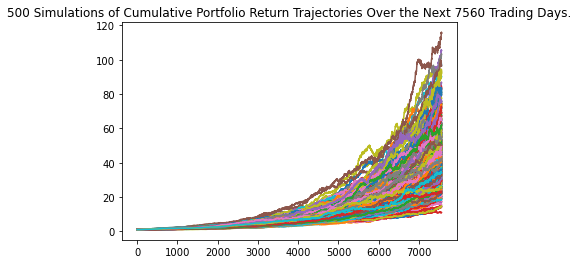

In [25]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()


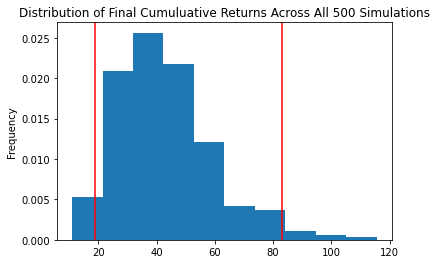

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()


### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             43.090744
std              16.877859
min              11.003920
25%              30.273958
50%              40.518855
75%              51.673330
max             115.541264
95% CI Lower     18.882116
95% CI Upper     83.238144
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $377642.33 and $1664762.89


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $566463.49 and $2497144.33


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [31]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jdbet\Desktop\Official_Miami\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999575,1.000109,0.998317,0.994905,0.996648,0.995478,1.001784,1.002673,1.003915,1.001344,...,1.006633,0.993463,1.006524,1.003270,1.002834,0.996198,0.996238,0.995723,0.997889,0.991170
2,0.994680,0.999807,1.001877,0.999384,0.994650,0.991326,1.002889,1.009493,1.010731,1.002164,...,1.003857,0.989304,1.010777,1.009879,1.008638,1.000220,0.994982,0.990970,1.004442,0.987841
3,0.994094,1.002004,1.004255,1.001141,0.999907,0.995275,1.004150,1.006034,1.007106,1.001766,...,1.001784,0.988037,1.021472,1.008707,1.007043,1.007288,0.998086,0.990659,1.008625,0.984221
4,0.995568,1.002374,0.997633,1.001166,0.998638,1.000183,0.999610,1.012566,1.002640,1.000961,...,1.002623,0.984988,1.019640,1.004538,1.010458,1.004718,1.001443,0.987422,1.011815,0.985135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.703070,2.447888,2.266804,2.152004,1.941608,1.781096,1.660666,1.705865,2.023540,1.457294,...,1.538540,1.938916,1.989809,1.585328,2.032154,2.223651,1.813237,2.206126,1.889814,1.893578
1257,1.692499,2.465834,2.262235,2.161528,1.960295,1.781911,1.673154,1.706248,2.020219,1.450770,...,1.548170,1.942295,1.986312,1.592058,2.028889,2.219029,1.802705,2.199905,1.884956,1.884531
1258,1.698929,2.471432,2.273353,2.157359,1.970594,1.781115,1.675587,1.709176,2.034741,1.444097,...,1.557005,1.941173,1.986974,1.595520,2.038142,2.223782,1.810955,2.204446,1.883809,1.878352
1259,1.690895,2.498277,2.286526,2.159958,1.979066,1.775070,1.671721,1.715283,2.029485,1.452411,...,1.557772,1.941038,1.975805,1.594015,2.025676,2.213426,1.804726,2.193844,1.884429,1.877773


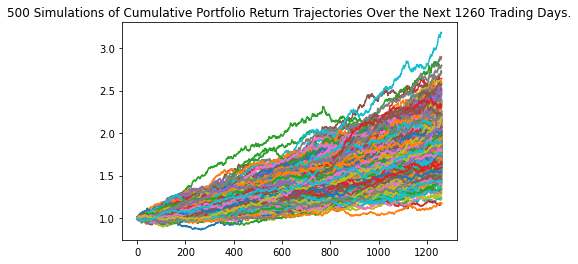

In [32]:
# Plot simulation outcomes
line_plot2 = MC_fiveyear.plot_simulation()


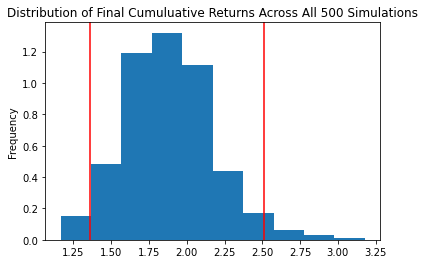

In [33]:
# Plot probability distribution and confidence intervals
dist_plot2 = MC_fiveyear.plot_distribution()


In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2 = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl2)



count           500.000000
mean              1.877479
std               0.296240
min               1.164113
25%               1.670569
50%               1.853348
75%               2.044421
max               3.178771
95% CI Lower      1.356092
95% CI Upper      2.511291
Name: 1260, dtype: float64


In [36]:
# Set initial investment
initial_investment2 = 60000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $566463.49 and $2497144.33


### Ten Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [38]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jdbet\Desktop\Official_Miami\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999015,0.992641,1.003311,1.006176,0.994934,1.000737,0.999833,1.000084,1.000580,1.000049,...,1.002063,1.001617,1.003495,1.003736,1.002165,1.007742,1.001903,1.001681,0.999350,1.001387
2,0.992804,0.986968,1.002099,1.006172,0.998598,0.999191,1.004984,1.000362,0.994119,0.995320,...,1.012585,1.004971,1.007341,1.000599,0.999550,1.018607,1.007828,1.004888,1.007879,1.000529
3,0.988883,0.990284,1.002193,1.011071,0.993754,0.995125,1.003677,1.004516,0.991297,0.995207,...,1.014283,1.002780,0.999957,0.996556,1.000381,1.021002,1.013253,0.999944,1.007560,1.003819
4,0.984638,0.987877,0.995639,1.018962,0.989270,0.995302,1.003321,1.008692,0.988198,0.993530,...,1.006908,1.005855,0.999334,0.996934,1.004362,1.021781,1.009269,0.999048,1.015494,1.001944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.594186,3.388583,2.694806,4.313295,4.828359,4.647712,4.298894,2.880646,4.755364,3.189919,...,3.409287,3.435278,3.026293,4.052194,3.268839,3.112221,2.627876,4.554176,6.199789,3.174679
2517,2.602329,3.392807,2.682248,4.331717,4.849932,4.645942,4.278555,2.885269,4.760740,3.162956,...,3.407812,3.430139,3.029337,4.049640,3.270288,3.109713,2.634290,4.568943,6.218508,3.185766
2518,2.618229,3.403273,2.692599,4.331716,4.839944,4.640901,4.239625,2.880974,4.729913,3.183678,...,3.411761,3.470336,3.037564,4.009837,3.274343,3.105292,2.613132,4.562079,6.171844,3.184909
2519,2.619838,3.366761,2.672102,4.324779,4.839644,4.682210,4.228305,2.866129,4.748082,3.166448,...,3.427858,3.467675,3.042520,3.978030,3.307051,3.110278,2.612961,4.537315,6.130250,3.196835


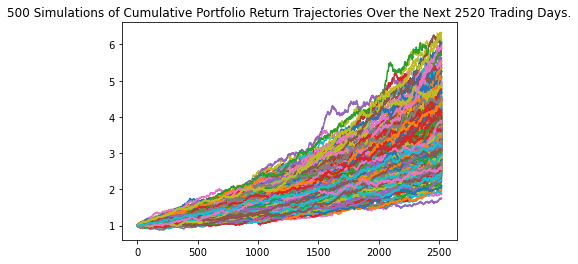

In [39]:
# Plot simulation outcomes
line_plot3 = MC_tenyear.plot_simulation()


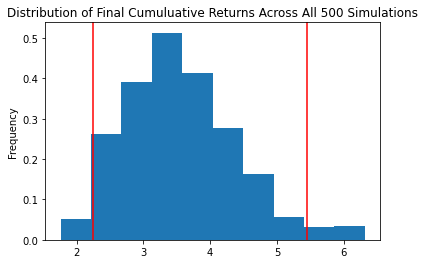

In [40]:
# Plot probability distribution and confidence intervals
dist_plot3 = MC_tenyear.plot_distribution()


In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl3 = MC_tenyear.summarize_cumulative_return()


# Print summary statistics
print(tbl3)

count           500.000000
mean              3.558105
std               0.828289
min               1.757140
25%               2.966927
50%               3.454143
75%               4.042825
max               6.316385
95% CI Lower      2.249315
95% CI Upper      5.444920
Name: 2520, dtype: float64


In [42]:
# Set initial investment
initial_investment3 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment3} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $566463.49 and $2497144.33
